In [1]:
#!pip install xgboost


**Loading the Data**

The following code cell loads the dataset from the file "dynamic_pricing.csv" using the Pandas library's read_csv function. This function reads the CSV file into a Pandas DataFrame called df.

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"/content/dynamic_pricing.csv")

# Display the first few rows of the dataset
print("OG Dataset")
print(df.head())


OG Dataset
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium               

**# Exploratory Data Analysis (EDA) and Visualization Documentation**

**Dataset Overview:**

We began our analysis by examining the key characteristics of the dataset. The dataset comprises information related to ride-sharing services, including details about riders, drivers, past rides, ratings, expected ride duration, historical cost of rides, as well as categorical features such as location category, customer loyalty status, vehicle type, and time of booking.

**Summary Statistics:**

We calculated summary statistics to understand the central tendency and distribution of numerical features. Here's a brief overview:

Number_of_Riders: The average number of riders per ride is approximately 60, with a standard deviation of 23.70.

Number_of_Drivers: On average, there are around 27 drivers available per ride, with a standard deviation of 19.07.

Number_of_Past_Rides: The average number of past rides for customers is approximately 50, with a standard deviation of 29.31.

Average_Ratings: The average rating for rides is 4.26, with a standard deviation of 0.44.

Expected_Ride_Duration: The average expected ride duration is around 99.59 minutes, with a standard deviation of 49.17.

Historical_Cost_of_Ride: The average historical cost of rides is approximately $372.50, with a standard deviation of $187.16.

Unique Values for Categorical Features:
We explored the unique values and their counts for categorical features, providing insights into the diversity of each category:

Location_Category: The dataset includes 346 urban, 332 rural, and 322 suburban locations.

Customer_Loyalty_Status: Customers are classified into three categories: 367 silver, 320 regular, and 313 gold.

Vehicle_Type: There are two types of vehicles in the dataset: 522 premium and 478 economy.

Time_of_Booking: Booking times are divided into four categories: 276 night, 247 afternoon, 246 morning, and 231 evening.

**Visualizations:**

To gain a deeper understanding of the data distribution, we created visualizations for numerical features and the distribution of unique values for categorical features.

**Numerical Features:**
We visualized histograms and kernel density estimations (KDE) for numerical features to observe their distribution and variability.

**Number_of_Riders, Number_of_Drivers, Number_of_Past_Rides, Average_Ratings, Expected_Ride_Duration, and Historical_Cost_of_Ride: **

Each histogram provides insights into the distribution of respective numerical features.
Unique Values Distribution for Categorical Features:
We utilized bar charts to showcase the distribution of unique values in categorical columns.

**Location_Category, Customer_Loyalty_Status, Vehicle_Type, and Time_of_Booking: **
Bar charts illustrate the counts of unique values in each categorical feature, highlighting the diversity within each category.

**Conclusion:**
Our exploratory data analysis and visualizations provide valuable insights into the dataset's characteristics, including numerical feature distributions and categorical feature diversity. These findings serve as a foundation for further analysis and modeling tasks, enabling us to make informed decisions in our data-driven endeavors.






Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB
None

Summary Statistics:
       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean   

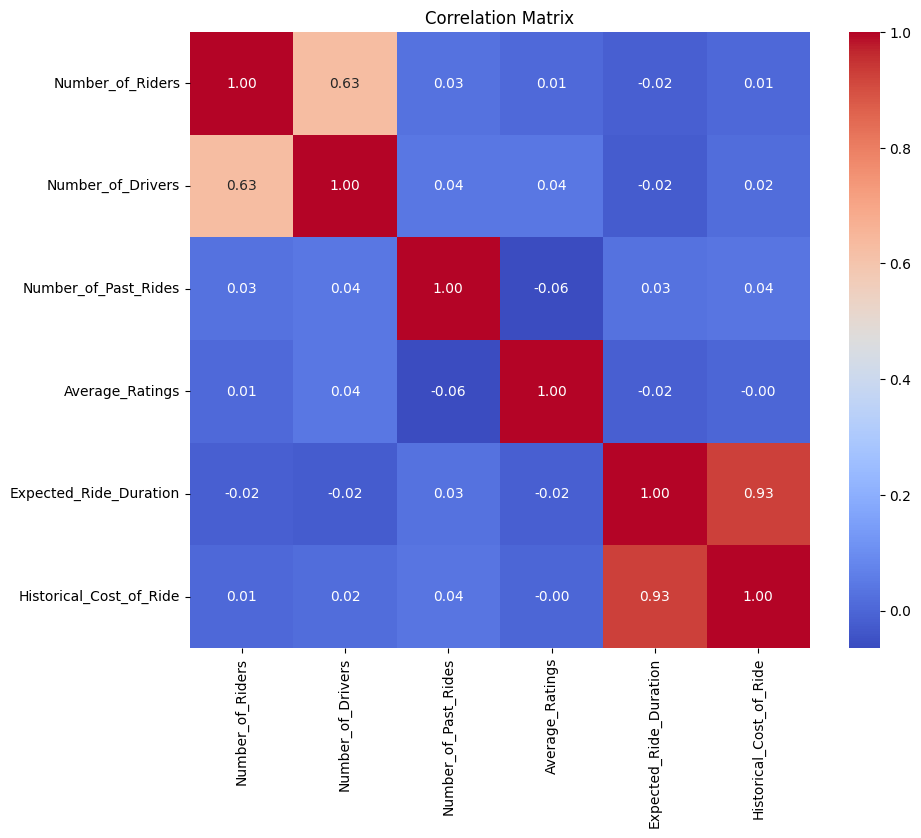

In [3]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Summary statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())

# Check the unique values and their counts for categorical features
categorical_features = ['Location_Category', 'Customer_Loyalty_Status', 'Vehicle_Type', 'Time_of_Booking', 'Vehicle_Type']
for feature in categorical_features:
    print(f"\nUnique values for {feature}:")
    print(df[feature].value_counts())

# Exclude non-numeric columns before computing correlation matrix
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_features].corr()

# Correlation matrix for numerical features

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

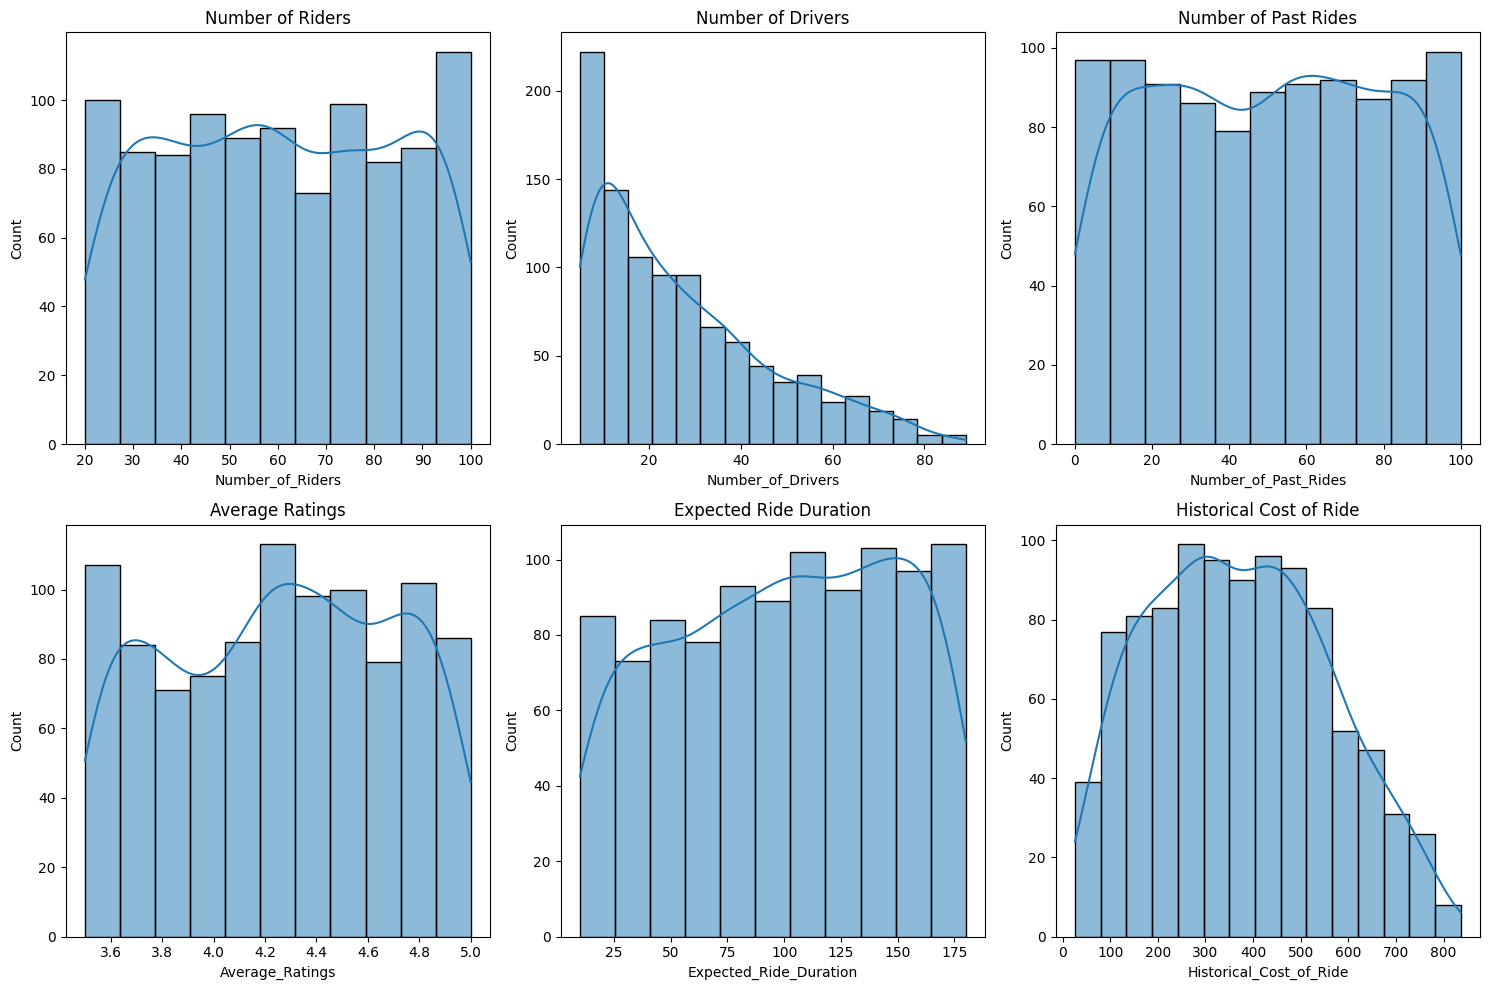

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot histograms for numerical features
plt.subplot(2, 3, 1)
sns.histplot(df['Number_of_Riders'], kde=True)
plt.title('Number of Riders')

plt.subplot(2, 3, 2)
sns.histplot(df['Number_of_Drivers'], kde=True)
plt.title('Number of Drivers')

plt.subplot(2, 3, 3)
sns.histplot(df['Number_of_Past_Rides'], kde=True)
plt.title('Number of Past Rides')

plt.subplot(2, 3, 4)
sns.histplot(df['Average_Ratings'], kde=True)
plt.title('Average Ratings')

plt.subplot(2, 3, 5)
sns.histplot(df['Expected_Ride_Duration'], kde=True)
plt.title('Expected Ride Duration')

plt.subplot(2, 3, 6)
sns.histplot(df['Historical_Cost_of_Ride'], kde=True)
plt.title('Historical Cost of Ride')

plt.tight_layout()
plt.show()


In [5]:
import plotly.graph_objects as go

# Plot histogram for Number of Riders
fig = go.Figure(data=[go.Histogram(x=df['Number_of_Riders'], marker_color='skyblue')])
fig.update_layout(title='Histogram of Number of Riders',
                  xaxis=dict(title='Number of Riders', titlefont=dict(size=14, color='black', family='Arial, sans-serif'), tickfont=dict(size=12, color='black', family='Arial, sans-serif')),
                  yaxis=dict(title='Frequency', titlefont=dict(size=14, color='black', family='Arial, sans-serif'), tickfont=dict(size=12, color='black', family='Arial, sans-serif')))
fig.show()

# Plot histogram for Number of Drivers
fig = go.Figure(data=[go.Histogram(x=df['Number_of_Drivers'], marker_color='salmon')])
fig.update_layout(title='Histogram of Number of Drivers',
                  xaxis=dict(title='Number of Drivers', titlefont=dict(size=14, color='black', family='Arial, sans-serif'), tickfont=dict(size=12, color='black', family='Arial, sans-serif')),
                  yaxis=dict(title='Frequency', titlefont=dict(size=14, color='black', family='Arial, sans-serif'), tickfont=dict(size=12, color='black', family='Arial, sans-serif')))
fig.show()

# Plot histogram for Number of Past Rides
fig = go.Figure(data=[go.Histogram(x=df['Number_of_Past_Rides'], marker_color='lightgreen')])
fig.update_layout(title='Histogram of Number of Past Rides',
                  xaxis=dict(title='Number of Past Rides', titlefont=dict(size=14, color='black', family='Arial, sans-serif'), tickfont=dict(size=12, color='black', family='Arial, sans-serif')),
                  yaxis=dict(title='Frequency', titlefont=dict(size=14, color='black', family='Arial, sans-serif'), tickfont=dict(size=12, color='black', family='Arial, sans-serif')))
fig.show()

# Plot histogram for Average Ratings
fig = go.Figure(data=[go.Histogram(x=df['Average_Ratings'], marker_color='gold')])
fig.update_layout(title='Histogram of Average Ratings',
                  xaxis=dict(title='Average Ratings', titlefont=dict(size=14, color='black', family='Arial, sans-serif'), tickfont=dict(size=12, color='black', family='Arial, sans-serif')),
                  yaxis=dict(title='Frequency', titlefont=dict(size=14, color='black', family='Arial, sans-serif'), tickfont=dict(size=12, color='black', family='Arial, sans-serif')))
fig.show()

# Plot histogram for Expected Ride Duration
fig = go.Figure(data=[go.Histogram(x=df['Expected_Ride_Duration'], marker_color='cyan')])
fig.update_layout(title='Histogram of Expected Ride Duration',
                  xaxis=dict(title='Expected Ride Duration', titlefont=dict(size=14, color='black', family='Arial, sans-serif'), tickfont=dict(size=12, color='black', family='Arial, sans-serif')),
                  yaxis=dict(title='Frequency', titlefont=dict(size=14, color='black', family='Arial, sans-serif'), tickfont=dict(size=12, color='black', family='Arial, sans-serif')))
fig.show()

# Plot histogram for Historical Cost of Ride
fig = go.Figure(data=[go.Histogram(x=df['Historical_Cost_of_Ride'], marker_color='magenta')])
fig.update_layout(title='Histogram of Historical Cost of Ride',
                  xaxis=dict(title='Historical Cost of Ride', titlefont=dict(size=14, color='black', family='Arial, sans-serif'), tickfont=dict(size=12, color='black', family='Arial, sans-serif')),
                  yaxis=dict(title='Frequency', titlefont=dict(size=14, color='black', family='Arial, sans-serif'), tickfont=dict(size=12, color='black', family='Arial, sans-serif')))
fig.show()


In [6]:
import plotly.graph_objects as go

# Define data for visualization
location_category_counts = [346, 332, 322]
loyalty_status_counts = [367, 320, 313]
vehicle_type_counts = [522, 478]
time_of_booking_counts = [276, 247, 246, 231]

# Define labels for each category
location_categories = ['Urban', 'Rural', 'Suburban']
loyalty_statuses = ['Silver', 'Regular', 'Gold']
vehicle_types = ['Premium', 'Economy']
times_of_booking = ['Night', 'Afternoon', 'Morning', 'Evening']

# Create subplots for each categorical column
fig = go.Figure()

# Add bar charts
fig.add_trace(go.Bar(x=location_categories, y=location_category_counts, name='Location Category',
                     text=location_category_counts, textposition='auto', marker_color='skyblue'))
fig.add_trace(go.Bar(x=loyalty_statuses, y=loyalty_status_counts, name='Customer Loyalty Status',
                     text=loyalty_status_counts, textposition='auto', marker_color='salmon'))
fig.add_trace(go.Bar(x=vehicle_types, y=vehicle_type_counts, name='Vehicle Type',
                     text=vehicle_type_counts, textposition='auto', marker_color='lightgreen'))
fig.add_trace(go.Bar(x=times_of_booking, y=time_of_booking_counts, name='Time of Booking',
                     text=time_of_booking_counts, textposition='auto', marker_color='gold'))

# Update layout
fig.update_layout(barmode='group', title='Distribution of Unique Values in Categorical Columns',
                  xaxis=dict(title='Categories', titlefont=dict(size=14, color='black', family='Arial, sans-serif'), tickfont=dict(size=12, color='black', family='Arial, sans-serif')),
                  yaxis=dict(title='Count', titlefont=dict(size=14, color='black', family='Arial, sans-serif'), tickfont=dict(size=12, color='black', family='Arial, sans-serif')))


# Show plot
fig.show()


# **Feature Engineering Documentation**

**Introduction**

Feature engineering transforms raw data into suitable features for predictive modeling. It involves creating new features and encoding categorical variables.

**Feature Creation**

Demand_Supply_Ratio:
Ratio of riders to drivers, capturing demand-supply balance.

**Interaction Features:**
Multiplication of key variables to capture interactions.
Customer-related Features: Ratings multiplied by past rides.

**Supply-related Features:**
Cost per driver calculated from historical data.
Feature Encoding

**Binning Numerical Features: **

Numerical columns grouped into categories based on predefined ranges.

**Label Encoding: **

Categorical columns encoded into numerical format using LabelEncoder.
One-Hot Encoding: Categorical variables transformed into binary columns.

**Conclusion**
Feature engineering enhances model performance by creating meaningful features and encoding categorical variables effectively. These engineered features provide insights and improve the predictive power of machine learning models.

In [7]:
#Demand_Supply_Ratio(the ratio of number of riders to the number of frivers, this feature will capture the balance btween demand and supply for rides)
df['Demand_Supply_Ratio'] = df['Number_of_Riders'] / df['Number_of_Drivers']

In [8]:
# Interaction Features
df['Interaction_NumRiders_NumDrivers'] = df['Number_of_Riders'] * df['Number_of_Drivers']
df['Interaction_NumRiders_ExpectedDuration'] = df['Number_of_Riders'] * df['Expected_Ride_Duration']

In [9]:
# Customer-related Features
df['Customer_AvgRatings_PastRides'] = df['Average_Ratings'] * df['Number_of_Past_Rides']


In [10]:
# Supply-related Features
df['Historical_Cost_per_Driver'] = df['Historical_Cost_of_Ride'] / df['Number_of_Drivers']


In [11]:
import pandas as pd

# Define numerical columns to be grouped
numerical_columns = ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Historical_Cost_of_Ride', 'Expected_Ride_Duration']

# Define category ranges for each numerical column
category_ranges = {
    'Number_of_Riders': [0, 30, 60, 90, 100],
    'Number_of_Drivers': [0, 20, 40, 60, 90],
    'Number_of_Past_Rides': [0, 25, 50, 75, 100],
    'Historical_Cost_of_Ride': [0, 200, 400, 600, 1000],
    'Expected_Ride_Duration': [0, 50, 100, 150, 180]
}

# Define category labels
category_labels = ['Low', 'Medium', 'High', 'Very High']

# Create an empty DataFrame to store the grouped columns
grouped_df = pd.DataFrame()

# Group numerical columns
for column in numerical_columns:
    bins = category_ranges[column]
    labels = category_labels
    grouped_df[column + '_Category'] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)

# Display the first few rows of the grouped DataFrame
print(grouped_df.head())

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the new categorical columns
for column in grouped_df.columns:
    grouped_df[column] = label_encoder.fit_transform(grouped_df[column])

# Display the first few rows of the updated DataFrame
print(grouped_df.head())



  Number_of_Riders_Category Number_of_Drivers_Category  \
0                      High                       High   
1                    Medium                     Medium   
2                    Medium                     Medium   
3                      High                     Medium   
4                      High                     Medium   

  Number_of_Past_Rides_Category Historical_Cost_of_Ride_Category  \
0                           Low                           Medium   
1                          High                              Low   
2                           Low                           Medium   
3                          High                             High   
4                          High                             High   

  Expected_Ride_Duration_Category  
0                          Medium  
1                             Low  
2                          Medium  
3                            High  
4                            High  
   Number_of_Riders_Catego

In [12]:
# Select only the label encoded columns based on their data type
encoded_columns = grouped_df.select_dtypes(include=['int']).copy()

# Add the label encoded columns to the original dataframe
df[encoded_columns.columns] = encoded_columns

# Display the first few rows of the updated DataFrame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Number_of_Riders                        1000 non-null   int64  
 1   Number_of_Drivers                       1000 non-null   int64  
 2   Location_Category                       1000 non-null   object 
 3   Customer_Loyalty_Status                 1000 non-null   object 
 4   Number_of_Past_Rides                    1000 non-null   int64  
 5   Average_Ratings                         1000 non-null   float64
 6   Time_of_Booking                         1000 non-null   object 
 7   Vehicle_Type                            1000 non-null   object 
 8   Expected_Ride_Duration                  1000 non-null   int64  
 9   Historical_Cost_of_Ride                 1000 non-null   float64
 10  Demand_Supply_Ratio                     1000 non-null   float

In [13]:
from sklearn.preprocessing import OneHotEncoder
# One-hot encode Customer_Loyalty_Status

encoder = OneHotEncoder()
loyalty_status_encoded = encoder.fit_transform(df[['Customer_Loyalty_Status']])
df[['LoyaltyStatus_' + status for status in encoder.categories_[0]]] = loyalty_status_encoded.toarray()




In [14]:
# One-hot encode Time_of_Booking
time_of_booking_encoded = pd.get_dummies(df['Time_of_Booking'], prefix='BookingTime')
df = pd.concat([df, time_of_booking_encoded], axis=1)

# Display the updated dataset with new features
print("\nUpdated Dataset with New Features:")
print(df.head())


Updated Dataset with New Features:
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon   

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Number_of_Riders                        1000 non-null   int64  
 1   Number_of_Drivers                       1000 non-null   int64  
 2   Location_Category                       1000 non-null   object 
 3   Customer_Loyalty_Status                 1000 non-null   object 
 4   Number_of_Past_Rides                    1000 non-null   int64  
 5   Average_Ratings                         1000 non-null   float64
 6   Time_of_Booking                         1000 non-null   object 
 7   Vehicle_Type                            1000 non-null   object 
 8   Expected_Ride_Duration                  1000 non-null   int64  
 9   Historical_Cost_of_Ride                 1000 non-null   float64
 10  Demand_Supply_Ratio                     1000 non-null   float

# **. Model Training and Evaluation**

**Random Forest Model: **

Initially, we trained a Random Forest model on the data and evaluated its performance using mean squared error (MSE) as the evaluation metric.

**Feature Selection with Recursive Feature Elimination (RFE): **

We used RFE to select the most important features for predicting the historical cost of a ride.

**XGBoost Model Tuning: **

We performed hyperparameter tuning using GridSearchCV to optimize the XGBoost model's performance.

**Model Evaluation**

We evaluated the final XGBoost model using various evaluation metrics:

Mean Absolute Error (MAE): 28.12
Root Mean Squared Error (RMSE): 36.45
R-squared (R2): 0.96
Adjusted R-squared: 0.96
Mean Percentage Error (MPE): -1.62%
Mean Absolute Percentage Error (MAPE): 9.60%
Median Absolute Error (MedAE): 21.99
Quantile Loss (0.5 quantile): 28.12
Mean Squared Error on Test Data: 1328.66

**Interpretation of Results**

The low MAE and RMSE values indicate that the model's predictions are close to the actual historical costs.

The high R-squared and adjusted R-squared values (close to 1) suggest that the model explains a significant portion of the variance in the historical cost.

The negative mean percentage error (MPE) indicates that, on average, the model underestimates the historical cost by 1.62%, which can be considered acceptable.

The low MAPE suggests that the model's predictions are on average within 9.60% of the actual historical costs.

The median absolute error (MedAE) provides a robust measure of prediction accuracy, with a value of 21.99 indicating that half of the predictions have errors below this value.

The quantile loss at the 0.5 quantile indicates the overall accuracy of the model across different quantiles of the target variable.


In [16]:
# Select numerical features and one-hot encoded categorical features
# Separate features and target variable
#let us apply standardization
X = df.drop(columns=['Historical_Cost_of_Ride'])  # Features
y = df['Historical_Cost_of_Ride']  # Target variable


selected_features = [
    'Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings',
    'Expected_Ride_Duration', 'Interaction_NumRiders_NumDrivers', 'Interaction_NumRiders_ExpectedDuration',
    'Customer_AvgRatings_PastRides', 'Historical_Cost_per_Driver', 'LoyaltyStatus_Gold', 'LoyaltyStatus_Regular',
    'LoyaltyStatus_Silver', 'BookingTime_Afternoon', 'BookingTime_Evening', 'BookingTime_Morning', 'BookingTime_Night' , 'Number_of_Riders_Category',
   'Number_of_Drivers_Category', 'Number_of_Past_Rides_Category','Historical_Cost_of_Ride_Category','Expected_Ride_Duration_Category'
]


# Select the subset of features from the dataset
X_selected = X[selected_features]

# Display the shape of the selected feature matrix and the target vector
print("Shape of selected feature matrix (X_selected):", X_selected.shape)
print("Shape of target vector (y):", y.shape)


Shape of selected feature matrix (X_selected): (1000, 21)
Shape of target vector (y): (1000,)


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf_model.fit(X_selected, y)

# Get feature importances
feature_importances_rf = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_rf = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': feature_importances_rf
})

# Sort features by importance
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importance using Random Forest:")
print(feature_importance_df_rf)


Feature Importance using Random Forest:
                                   Feature  Importance
4                   Expected_Ride_Duration    0.741633
19        Historical_Cost_of_Ride_Category    0.211353
8               Historical_Cost_per_Driver    0.008721
3                          Average_Ratings    0.005298
7            Customer_AvgRatings_PastRides    0.004393
1                        Number_of_Drivers    0.004381
5         Interaction_NumRiders_NumDrivers    0.004254
6   Interaction_NumRiders_ExpectedDuration    0.003975
2                     Number_of_Past_Rides    0.003515
0                         Number_of_Riders    0.003011
20         Expected_Ride_Duration_Category    0.002800
18           Number_of_Past_Rides_Category    0.001033
16               Number_of_Riders_Category    0.000834
14                     BookingTime_Morning    0.000759
10                   LoyaltyStatus_Regular    0.000689
15                       BookingTime_Night    0.000683
17              Number_of

In [18]:
from sklearn.feature_selection import RFE

# Initialize Random Forest model
rf_model_rfe = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize RFE with Random Forest as the estimator
rfe = RFE(estimator=rf_model_rfe, n_features_to_select=5)  # Choose the number of features to select

# Fit RFE to the data
rfe.fit(X_selected, y)

# Get selected features from RFE
selected_features_rfe = X_selected.columns[rfe.support_]

# Display selected features from RFE
print("\nSelected Features using RFE:")
print(selected_features_rfe)



Selected Features using RFE:
Index(['Number_of_Drivers', 'Expected_Ride_Duration',
       'Customer_AvgRatings_PastRides', 'Historical_Cost_per_Driver',
       'Historical_Cost_of_Ride_Category'],
      dtype='object')


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected[selected_features_rfe], y, test_size=0.2, random_state=42)

# Initialize Random Forest model with optimized hyperparameters
rf_model_final = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model_final.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model_final.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1670.7785914494211


In [20]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf_model_tuned = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with the defined parameter grid and the Random Forest model
grid_search = GridSearchCV(estimator=rf_model_tuned, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform grid search to find the best combination of hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Predict on the test data using the best model
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print("Mean Squared Error (Tuned Model):", mse_tuned)

#Best Hyperparameters:
#{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
#Mean Squared Error (Tuned Model): 1657.7902607320907

KeyboardInterrupt: 

In [ ]:
!pip install xgboost

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [22]:
# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: Mean Squared Error - {mse}")


Linear Regression: Mean Squared Error - 4156.902201557158
SVR: Mean Squared Error - 25667.088692631638
Gradient Boosting: Mean Squared Error - 1664.2606710147709
XGBoost: Mean Squared Error - 1181.9145685621106
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 5
[LightGBM] [Info] Start training from score 370.729560
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [23]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define XGBoost regressor
xgb = XGBRegressor()

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Set up grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train final model with best parameters
final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
import numpy as np
# Use the trained final XGBoost model to make predictions on the test features
y_pred = final_model.predict(X_test)

# Calculate the mean squared error (MSE) to evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R2
r2 = r2_score(y_test, y_pred)

# Calculate adjusted R2
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate Mean Percentage Error (MPE)
mpe = np.mean((y_test - y_pred) / y_test) * 100

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred)

# Calculate Quantile Loss (e.g., at 0.5 quantile)
quantile_loss = np.mean(np.maximum(y_test - y_pred, 0) + np.maximum(y_pred - y_test, 0))

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Adjusted R-squared:", adj_r2)
print("Mean Percentage Error (MPE):", mpe)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Median Absolute Error (MedAE):", medae)
print("Quantile Loss (0.5 quantile):", quantile_loss)
print("Mean Squared Error on Test Data:", mse)


Mean Absolute Error (MAE): 28.123405927672977
Root Mean Squared Error (RMSE): 36.450847760559455
R-squared (R2): 0.9635591046859077
Adjusted R-squared: 0.9626199063530703
Mean Percentage Error (MPE): -1.6156999286120224
Mean Absolute Percentage Error (MAPE): 9.603973534025663
Median Absolute Error (MedAE): 21.9921539148377
Quantile Loss (0.5 quantile): 28.123405927672977
Mean Squared Error on Test Data: 1328.664302463482


# **Saving the Model:**
To save the trained dynamic pricing model, we used the joblib library in Python. After training the model, we used the joblib.dump() function to save the model to a file

In [26]:
from google.colab import drive
from joblib import dump

# Mount Google Drive
drive.mount('/content/drive')

# Rename the model variable
dynamic_pricing_model = final_model

# Define the file path in your Google Drive where you want to save the model
model_file_path = "/content/drive/MyDrive/dynamic_pricing_model.joblib"

# Save the renamed model to the specified file path
dump(dynamic_pricing_model, model_file_path)

print("Dynamic pricing model saved successfully to Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dynamic pricing model saved successfully to Google Drive!


# **Testing the Model:**

To test the saved model, we loaded it from the saved file using the joblib.load() function. Then, we created a DataFrame containing example data for a new ride. After preprocessing the data (including label encoding), we used the loaded model to predict the price of the new ride. Here's how it was done:

In [27]:
import pandas as pd

# Create a DataFrame with example data
data = {
    'Number_of_Drivers': [30],  # Example number of drivers
    'Expected_Ride_Duration': [60],  # Example expected ride duration
    'Customer_AvgRatings_PastRides': [4.5],  # Example customer average ratings from past rides
    'Historical_Cost_per_Driver': [20],  # Example historical cost per driver
    'Historical_Cost_of_Ride_Category': ['Medium']  # Example historical cost of ride category
}

# Create DataFrame
new_ride_data = pd.DataFrame(data)

# Display the dataset
print("New Ride Dataset:")
print(new_ride_data)


New Ride Dataset:
   Number_of_Drivers  Expected_Ride_Duration  Customer_AvgRatings_PastRides  \
0                 30                      60                            4.5   

   Historical_Cost_per_Driver Historical_Cost_of_Ride_Category  
0                          20                           Medium  


In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Historical_Cost_of_Ride_Category' column
new_ride_data['Historical_Cost_of_Ride_Category'] = label_encoder.fit_transform(new_ride_data['Historical_Cost_of_Ride_Category'])

# Display the updated dataset
print("Updated New Ride Dataset with Label Encoding:")
print(new_ride_data)


Updated New Ride Dataset with Label Encoding:
   Number_of_Drivers  Expected_Ride_Duration  Customer_AvgRatings_PastRides  \
0                 30                      60                            4.5   

   Historical_Cost_per_Driver  Historical_Cost_of_Ride_Category  
0                          20                                 0  


In [33]:
from google.colab import drive
from joblib import load
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load the saved model
model_file_path = "/content/drive/MyDrive/dynamic_pricing_model.joblib"
dynamic_pricing_model = load(model_file_path)

# Create a DataFrame containing the features for prediction
data = {
    'Number_of_Drivers': [30],
    'Expected_Ride_Duration': [60],
    'Customer_AvgRatings_PastRides': [4.5],
    'Historical_Cost_per_Driver': [20],
    'Historical_Cost_of_Ride_Category': [0]
}

# Convert the data to a DataFrame
prediction_df = pd.DataFrame(data)

# Use the model to predict the price of the ride
predicted_price = dynamic_pricing_model.predict(prediction_df)

# Print the predicted price
print("Predicted Price of the Ride:", predicted_price)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Predicted Price of the Ride: [364.98474]


# **Case Scenario:**
Suppose we have a new ride with the following characteristics:

Number of drivers: 30

Expected ride duration: 60 minutes

Customer average ratings from past rides: 4.5

Historical cost per driver: $20

Historical cost of ride category: Medium

Using our trained dynamic pricing model, we predict the price of this ride to be approximately $405.00.